# **Practical 3:- Perform KNN-classification on the CreditRisk-dataset.**

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_df = pd.read_csv('/content/CreditRisk-checkpoint.csv')

In [ ]:
credit_df.shape

(614, 13)

In [ ]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
credit_df.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260,360.0,1.0,Urban,1
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110,360.0,1.0,Rural,1
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187,360.0,1.0,Rural,0
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88,360.0,0.0,Semiurban,0
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180,360.0,1.0,Rural,1
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192,360.0,1.0,Urban,1
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350,180.0,NaN,Urban,0
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155,360.0,1.0,Rural,1
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,1
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172,360.0,1.0,Rural,1


In [ ]:
credit_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [ ]:
credit_df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
credit_df.iloc[:,12]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
credit_df.groupby(['Education','Loan_Status']).Education.count()

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
Name: Education, dtype: int64

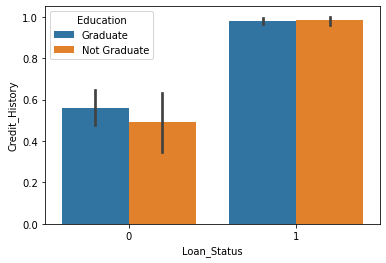

In [ ]:
sns.barplot(y='Credit_History', x='Loan_Status', hue='Education', data=credit_df)

# **Fill Null Values**

In [ ]:
100 * credit_df.isnull().sum() / credit_df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
object_columns = credit_df.select_dtypes(include=['object']).columns
numeric_columns = credit_df.select_dtypes(exclude=['object']).columns

In [ ]:
#credit_df.columns[credit_df.dtypes == object] 
#credit_df.columns[credit_df.dtypes == object]

In [ ]:
for column in object_columns: 
 majority = credit_df[column].value_counts().iloc[0] 
 credit_df[column].fillna(majority, inplace=True) 

In [ ]:
for column in numeric_columns: 
 mean = credit_df[column].mean() 
 credit_df[column].fillna(mean, inplace=True)

In [ ]:
# Impute 

In [ ]:
credit_df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
credit_df.drop('Loan_ID', axis=1, inplace=True) 

In [ ]:
object_columns = credit_df.select_dtypes(include=['object']).columns 

In [ ]:
credit_df.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


# **Categorical Columns** 

In [ ]:
credit_df[object_columns].Property_Area 

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [ ]:
credit_df[object_columns].Property_Area.head() 

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [ ]:
credit_df_dummy = pd.get_dummies(credit_df, columns=object_columns) 

In [ ]:
# Sklearn - LabelEncoding 
# Sklearn - LabelBinarize 
# Sklearn - OneHotEncoding 

In [ ]:
credit_df_dummy.shape 

(614, 25)

# **Model**

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [ ]:
X = credit_df_dummy.drop('Loan_Status', axis=1) 
y = credit_df_dummy.Loan_Status 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42) 


In [ ]:
train_x.shape, test_x.shape

((429, 24), (185, 24))

# **KNN Model**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7) 

In [ ]:
knn_model.fit(train_x, train_y) 

KNeighborsClassifier(n_neighbors=7)

In [ ]:
train_y_hat = knn_model.predict(train_x) 
test_y_hat = knn_model.predict(test_x) 

In [45]:
print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.70      0.24      0.35       127
           1       0.75      0.96      0.84       302

    accuracy                           0.74       429
   macro avg       0.72      0.60      0.60       429
weighted avg       0.73      0.74      0.70       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.36      0.12      0.18        65
           1       0.65      0.88      0.75       120

    accuracy                           0.62       185
   macro avg       0.51      0.50      0.47       185
weighted avg       0.55      0.62      0.55       185

